Description:
-----------------
A jupyter notebook predicting the case rate of a given disease in a county using various linear regression models

In [145]:
import pandas as pd
import matplotlib
import seaborn as sns
from sklearn.linear_model import PoissonRegressor, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import os
import numpy as np
import matplotlib.pyplot as plt

In [146]:
# Load the data from the dataset created with another jupyter notebook
data = pd.read_csv('./Campylobacteriosis_case_rate_year_over_year.csv')


In [147]:
# Lets see how each of the values are stored for interpretation
data.dtypes

Disease        object
County         object
Year            int64
Sex            object
Cases         float64
Population      int64
Rate          float64
dtype: object

In [148]:
# Lets validate that the data was stored correctly, yup looks about right to me
data

,Disease,County,Year,Sex,Cases,Population,Rate
0,Campylobacteriosis,Los Angeles,2001,Total,1221.0,9635795,0.012672
1,Campylobacteriosis,Los Angeles,2002,Total,1154.0,9722444,0.011869
2,Campylobacteriosis,Los Angeles,2003,Total,1146.0,9791022,0.011705
3,Campylobacteriosis,Los Angeles,2004,Total,950.0,9822508,0.009672
4,Campylobacteriosis,Los Angeles,2005,Total,777.0,9809557,0.007921
5,Campylobacteriosis,Los Angeles,2006,Total,818.0,9787327,0.008358
6,Campylobacteriosis,Los Angeles,2007,Total,868.0,9773894,0.008881
7,Campylobacteriosis,Los Angeles,2008,Total,1138.0,9796812,0.011616
8,Campylobacteriosis,Los Angeles,2009,Total,1189.0,9805233,0.012126
9,Campylobacteriosis,Los Angeles,2010,Total,1302.0,9818603,0.013261


In [152]:
# I want to base the predictions on the year and case rate
X = data[["Year"]].values
# X = data[["Year","Rate"]]
y = data["Cases"].values
# y = data["Rate"]


# Lets test out the different models we want to use to predict the case rate for the year 2024
poisson_model = PoissonRegressor()
linear_model = LinearRegression()
gradient_boost_model = GradientBoostingRegressor()
random_forest_model = RandomForestRegressor()


# Fit the model to your data
linear_model.fit(X, y)
poisson_model.fit(X, y)
gradient_boost_model.fit(X, y)
random_forest_model.fit(X, y)

# Make predictions
year = 2024
next_year = np.array([[year]])
linear_predicted_count = linear_model.predict(next_year)
poisson_predicted_count = poisson_model.predict(next_year)
gradient_boost_predicted_count = gradient_boost_model.predict(next_year)
random_forest_predicted_count = random_forest_model.predict(next_year)

# Determining the most accurate model

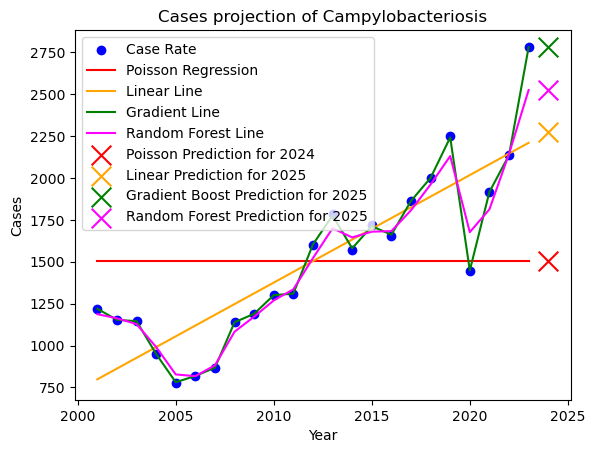

In [153]:
# Let's plot the predicted case rate for different models to see which fits the data best
plt.scatter(data['Year'], data['Cases'], color='blue', label='Case Rate')
plt.plot(data['Year'], poisson_model.predict(X), color='red', label='Poisson Regression')
plt.plot(data['Year'], linear_model.predict(X), color='orange', label='Linear Line')
plt.plot(data['Year'], gradient_boost_model.predict(X), color='green', label='Gradient Line')
plt.plot(data['Year'], random_forest_model.predict(X), color='magenta', label='Random Forest Line')
plt.scatter(year, poisson_predicted_count, color='red', marker='x', s=200, label='Poisson Prediction for {}'.format(year))
plt.scatter(year, linear_predicted_count, color='orange', marker='x', s=200, label='Linear Prediction for 2025')
plt.scatter(year, gradient_boost_predicted_count, color='green', marker='x', s=200, label='Gradient Boost Prediction for 2025')
plt.scatter(year, random_forest_predicted_count, color='magenta', marker='x', s=200, label='Random Forest Prediction for 2025')

plt.title("Cases projection of {}".format(data['Disease'][0]))
plt.xlabel('Year')
plt.ylabel('Cases')
plt.legend()
plt.show()

# Predicted Case Count for 2024

In [164]:
# Arrays showing the predicted case rate
print("Linear predicted count for {}: {:.2f}".format(year, linear_predicted_count[0]))
print("Poisson predicted count for {}: {:.2f}".format(year, poisson_predicted_count[0]))
print("Gradient predicted count for {}: {:.2f}".format(year, gradient_boost_predicted_count[0]))
print("Random Forest predicted count for {}: {:.2f}".format(year, random_forest_predicted_count[0]))

Linear predicted count for 2024: 2273.92
Poisson predicted count for 2024: 1504.13
Gradient predicted count for 2024: 2780.26
Random Forest predicted count for 2024: 2524.77


# Interpretation

I would have predicted that the case rate would have been best suited for a Poisson distribution, given that it's modeling a count. But I guess the long-term dependencies here have the trend fit side more with a Gradient boost, it also has the lowest Mean Squared Error

In [155]:
# Let's evaluate the residuals for all of these models
from sklearn.metrics import mean_squared_error
linear_mse = mean_squared_error(y, linear_model.predict(X))
poisson_mse = mean_squared_error(y, poisson_model.predict(X))
gradient_mse = mean_squared_error(y, gradient_boost_model.predict(X))
random_forest_mse = mean_squared_error(y, random_forest_model.predict(X))

print('\nMean Squared Errors:')
print("Linear MSE:",linear_mse )
print("Poisson MSE", poisson_mse )
print("Gradient MSE:",gradient_mse)
print("Random Forest MSE:",random_forest_mse)


Mean Squared Errors:
Linear MSE: 64625.220785358535
Poisson MSE 245690.54820415884
Gradient MSE: 11.325972526215455
Random Forest MSE: 7914.713995652176


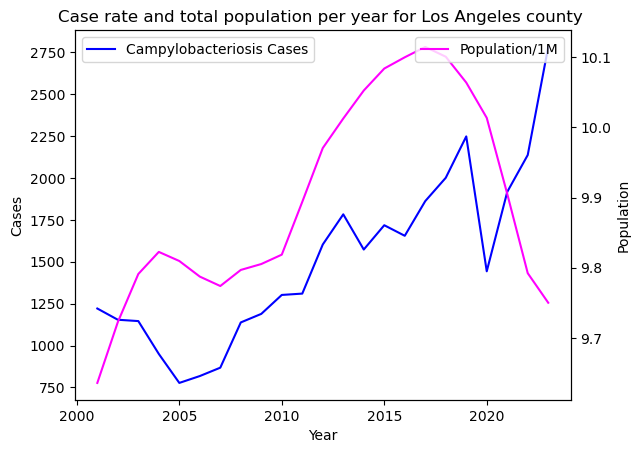

In [162]:
# Lets visualize the case rate with the population, and maybe reveal a trend
fig, ax1 = plt.subplots()
plt.title("Case rate and total population per year for {} county ".format(data['County'][0]))

# ax1.plot(data['Year'], 1E6*data['Cases']/data['Population'], color='blue', label='Cases') # Cases per million people, unrealistic maybe
ax1.plot(data['Year'], data['Cases'], color='blue', label='{} Cases'.format(data['Disease'][0]))

ax1.set_ylabel('Cases')
ax1.set_xlabel('Year')

# Lets make a separate axis to show the population
ax2 = ax1.twinx()
# ax2.set_yscale('log') # Potentially put this on a log scale
ax2.set_ylabel('Population')
ax2.plot(data['Year'], data['Population']/1E6, color='magenta', label='Population/1M')

# Lets place the legends in the appropriate places
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.savefig("../plots/.png")

# Revealing Trends

Its interesting to see that the case rate and have a negative correlation. I wonder why that is. This means that more people are getting sick per capita by food poisoning as the population goes down. I would assume a positive correlation since naturally if there are more people, then there would be more people getting sick. 

It is also interesting to see the dip in population start at in 2019, again most likely due to the COVID-19 pandemic.

TODO: Generalize this to make the same plots for all diseases